# Ансамбли моделей

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Основная идея:

* строятся базовые модели, отличающиеся друг от друга
* агрегация прогнозов в ансамбль с применением мета-алгоритма

Агрегация:



In [9]:
from sklearn.datasets import load_iris

iris = load_iris()

## RandomForest

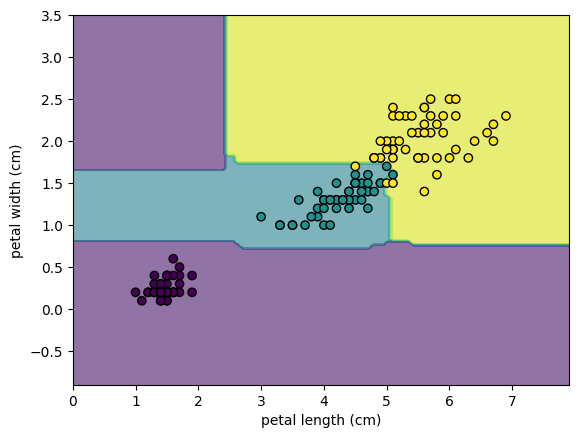

In [10]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#позволяет визуализировать границы принятия решений обученной модели с указанной цветовой картой

X = iris.data[:, 2:4]

rf = RandomForestClassifier(n_estimators=50, max_depth=4).fit(X, iris.target)

fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    rf,
    X,
    response_method="predict",
    alpha=0.6,
    ax=ax,
    xlabel=iris.feature_names[2],
    ylabel=iris.feature_names[3],
    cmap='viridis'
)

disp.ax_.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, edgecolor="black")

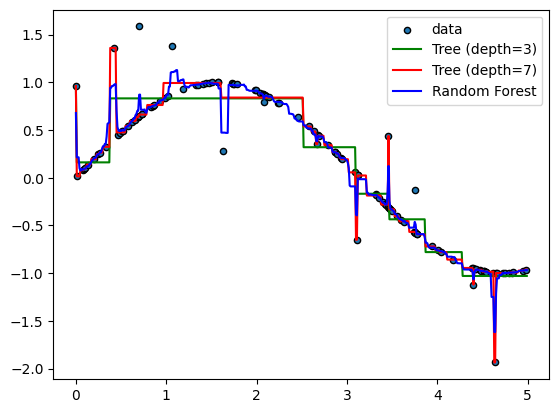

In [11]:
rng = np.random.RandomState(1)

X = np.sort(5* rng.rand(120,1), axis = 0)
y = np.sin(X).ravel()
y[::10] += 2 * (0.5- rng.rand(12))

tree1 = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X, y)
tree2 = DecisionTreeRegressor(max_depth=7, random_state=42).fit(X, y)
rf = RandomForestRegressor(random_state=42).fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:,np.newaxis]

plt.scatter(X, y, s=20, edgecolor="black", label="data")
plt.plot(X_test, tree1.predict(X_test), color="green", label="Tree (depth=3)")
plt.plot(X_test, tree2.predict(X_test), color="red", label="Tree (depth=7)")
plt.plot(X_test, rf.predict(X_test), color="blue", label="Random Forest")

plt.legend()
plt.show()

## AdaBoost

In [37]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

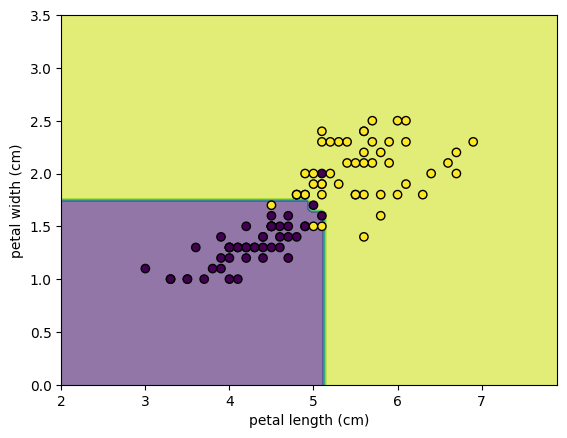

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.inspection import DecisionBoundaryDisplay
#позволяет визуализировать границы принятия решений обученной модели с указанной цветовой картой

X = iris.data[51:, 2:4]
y = iris.target[51:]
y[59] = 1

stump = DecisionTreeClassifier(max_depth=2)
ada = AdaBoostClassifier(estimator=stump, n_estimators=5, random_state=42).fit(X, y)

fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    ada,
    X,
    response_method="predict",
    alpha=0.6,
    ax=ax,
    xlabel=iris.feature_names[2],
    ylabel=iris.feature_names[3],
    cmap='viridis'
)

disp.ax_.scatter(X[:,0:1], X[:,1:2], c=y, edgecolor="black")

# Регрессия

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
df = pd.read_csv('loan_data.csv', sep=',')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [15]:
df.select_dtypes(include=['object']).columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
lab_encoder = LabelEncoder()

df["person_gender"] = lab_encoder.fit_transform(df["person_gender"])
df["previous_loan_defaults_on_file"] = lab_encoder.fit_transform(df["previous_loan_defaults_on_file"])
df = pd.get_dummies(df, columns = ['person_education'], prefix = '', prefix_sep = '', drop_first = True)
df = pd.get_dummies(df, columns = ['person_home_ownership'], prefix = '', prefix_sep = '', drop_first = True)
df = pd.get_dummies(df, columns = ['loan_intent'], prefix = '', prefix_sep = '', drop_first = True)

df.head(3)

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,High School,Master,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,False,True,False,False,True,False,False,False,True,False
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,True,False,False,True,False,True,False,False,False,False
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,True,False,False,False,False,False,False,True,False,False


In [17]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('F1 = ', metrics.f1_score(y_test, y_pred))

F1 =  0.7696531070626403


In [18]:
rf = RandomForestClassifier(n_estimators=100, max_samples=0.15, oob_score=True, max_features=5, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('RF: F1 = ', metrics.f1_score(y_test, y_pred))

RF: F1 =  0.8176645895421295


In [46]:
from xgboost import XGBClassifier

X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

xgb = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=1)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print('F1 = ', metrics.f1_score(y_test, y_pred))

F1 =  0.838974358974359


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

clf = make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('SVC: F1 = ', metrics.f1_score(y_test, y_pred))

SVC: F1 =  0.7676508344030809


In [49]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, max_depth=8, learning_rate=1))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Stacking: F1 = ', metrics.f1_score(y_test, y_pred))

Stacking: F1 =  0.8406102051551815


# K-кратная перекрестная проверка

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.88152713, 0.86979509, 0.86801174, 0.87704267, 0.89809096])

In [22]:
print('score = %0.3f ± %0.3f' % (np.mean(scores), np.std(scores)))

score = 0.879 ± 0.011


## Feature Importance

In [23]:
# Random Forest Model
random_forest = RandomForestClassifier(random_state=1,max_depth=8)
random_forest.fit(X_train, y_train)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

importances

,feature,importance
9,previous_loan_defaults_on_file,0.358
6,loan_percent_income,0.216
5,loan_int_rate,0.143
2,person_income,0.108
16,RENT,0.080
4,loan_amnt,0.034
15,OWN,0.014
8,credit_score,0.013
21,VENTURE,0.007
19,MEDICAL,0.006


In [24]:
sum(importances.importance)

0.999

## Gridsearch

In [25]:
from xgboost import XGBClassifier

X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

xgb = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=1)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print('F1 = ', metrics.f1_score(y_test, y_pred))

F1 =  0.838974358974359


In [26]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


In [51]:
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

cat = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, logging_level='Silent')
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)
print('F1 = ', metrics.f1_score(y_test, y_pred))

F1 =  0.8534099817089104


In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, parameters, cv=5)
#grid_search = RandomizedSearchCV(rf, param_distributions=parameters, n_iter=10, cv=5)
grid_search.fit(X_train, y_train)

best = grid_search.best_estimator_
print(best.get_params())

y_pred = best.predict(X_test)
print('F1 = ', metrics.f1_score(y_test, y_pred))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
F1 =  0.8274932614555256
